<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Получите данные и загрузите их в рабочую среду.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/heart')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

**2. Подготовьте датасет к обучению моделей.**

Сначала проверим, из чего состоит датасет

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Можем заметить, что в данных нет пропусков.

Теперь проверим статистику по датасету.

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Можем заметить, что в данных есть некорректные значения. Например минимальное значение артетриального давления в покое равно 0, чего не может быть. Проверим данные на выбросы.

Посмотрим на гистограммы распределений всех данных в датасете.

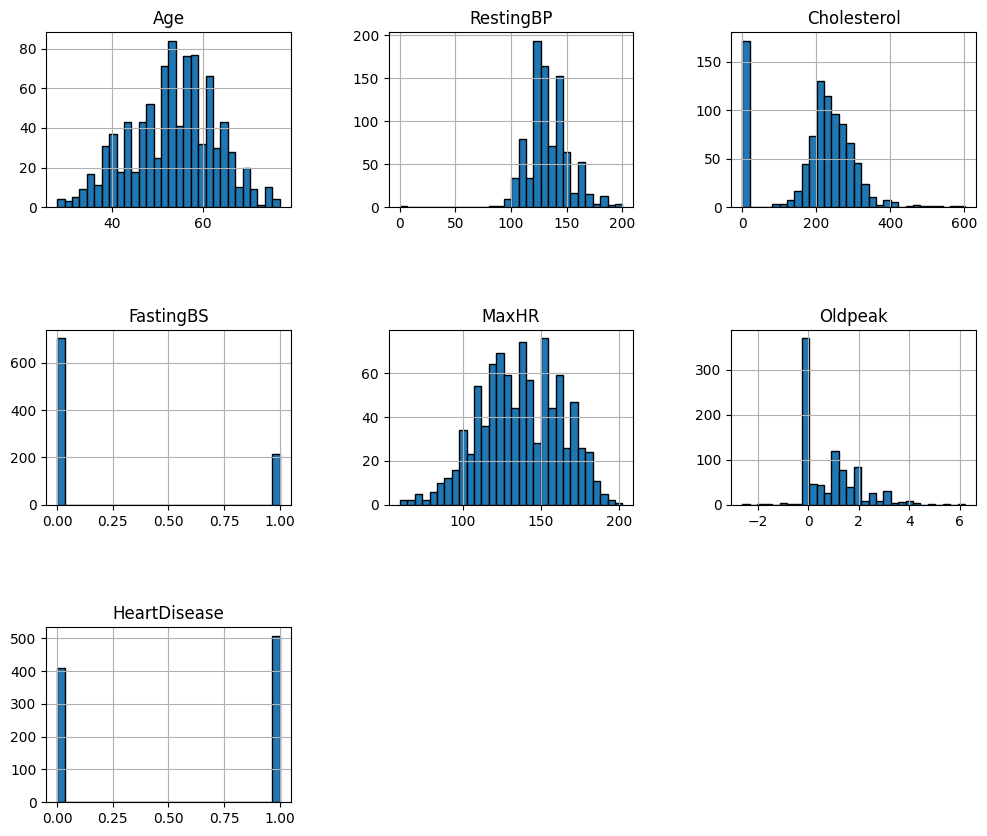

In [ ]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Можем заметить, что в данных присутствуют некоторые сомнительные моменты, но без достаточных медицинских знаний не будем такое утверждать. Рассмотрим распределение по переменной "RestingBP", т.к. заметили там подозрение на выброс. Также уберём все нулевые значения для переменной "Cholesterol", т.к. уровень холестерина оказывает влияние на здоровье сердца.

<Axes: xlabel='RestingBP'>

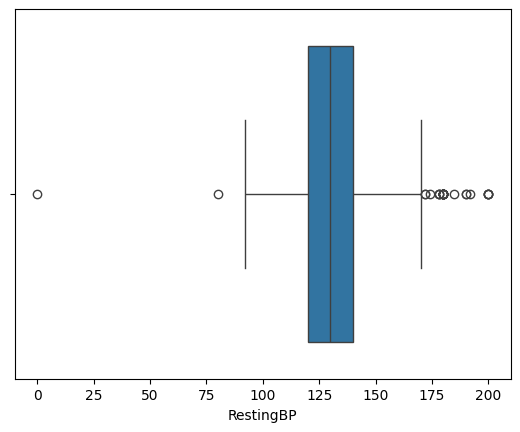

In [ ]:
sns.boxplot(x=data["RestingBP"])

In [ ]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Видим, что одна запись имеет значение, которого не может быть в реальном мире. Удалим эту строку из датасета.

In [ ]:
data_new = data.drop(index=[449])

Удалим все строки, у которых значения в переменной "Cholesterol" = 0

In [ ]:
data_new = data[data['Cholesterol'] != 0]

In [ ]:
data_new = data_new.reset_index(drop=True)

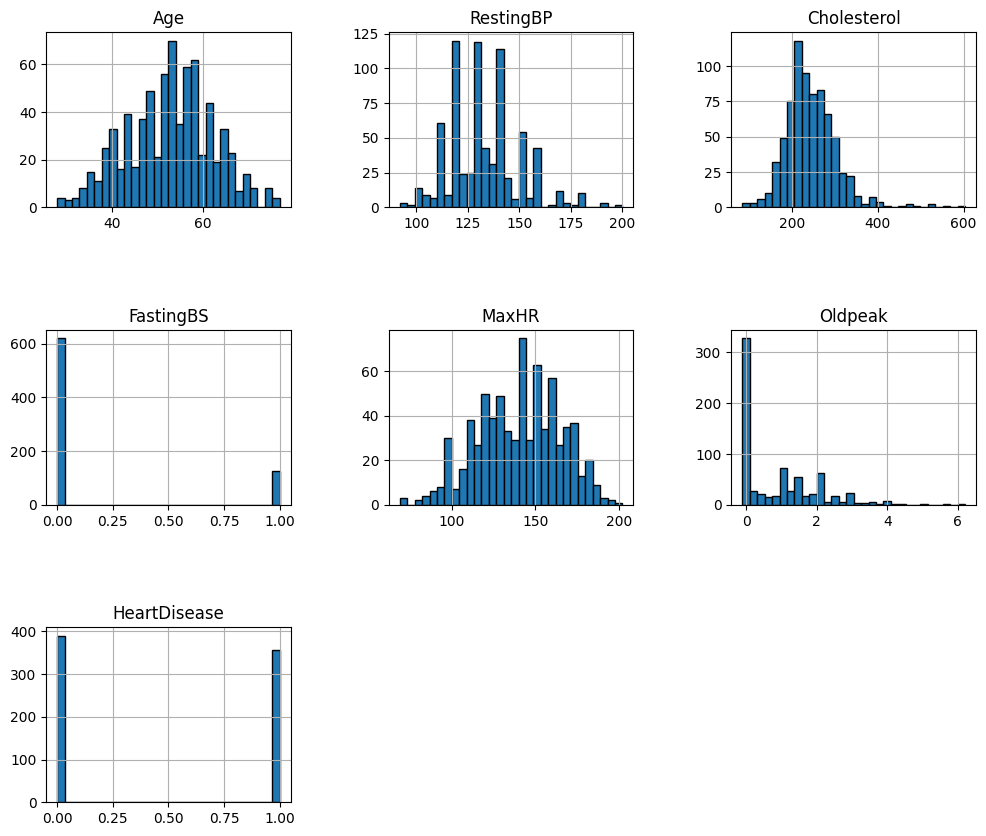

In [ ]:
data_new.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
data_new.shape

(746, 12)

Можем заметить, что потеряли значительную часть данных, зато убрали неверные значения, что должно положительно сказаться на качестве работы модели.

Стоит заметить, что значения целевой переменной распределены практически равномерно.

Теперь проверим, сколько уникальных данных присутствует в каждой переменной.

In [ ]:
data_new.nunique()

Age                49
Sex                 2
ChestPainType       4
RestingBP          63
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             109
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

Найдём категориальный признаки.

In [ ]:
categorials = data_new.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Заметим, что в датасете 5 категориальных переменных, которые можем перевести в числовые при помощи one-hot encoding и при этом не добавим большое количество переменных (14 переменных).

In [ ]:
x = pd.get_dummies(data_new, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Уберём целевую переменную из датасета
y = data_new["HeartDisease"]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
x = x.drop(["HeartDisease", "Sex_F"], axis=1)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,1,0,0,1,0,0,1,0,1,0,0,0,1


**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**4. Обучите дерево решений на обучающем множестве.**

**a) tree.DecisionTreeClassifier**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
start_time_dt = time.time()
dt.fit(x_train, y_train)
end_time_dt = time.time()
elapsed_time_dt = end_time_dt - start_time_dt
print(f'Время выполнения обучения дерева решений: {elapsed_time_dt:.4f} секунд')

Время выполнения обучения дерева решений: 0.0125 секунд


In [ ]:
dt_score = dt.score(x_test, y_test)
print(f'Score для дерева решений: {dt_score:.4f}')

Score для дерева решений: 0.8333


In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Метод', 'Score', 'Время обучения модели, с'])

In [ ]:
results.loc[len(results)] = ['Дерево решений', dt_score, elapsed_time_dt]

**b) ensemble.RandomForestClassifier**

In [ ]:
# Создаем модель RandomForest
clf_cf = RandomForestClassifier(random_state=42)
start_time_rfc = time.time()
clf_cf.fit(x_train, y_train)
end_time_rfc = time.time()
elapsed_time_rfc = end_time_rfc - start_time_rfc
print(f'Время выполнения обучения дерева решений: {elapsed_time_rfc:.4f} секунд')

Время выполнения обучения дерева решений: 0.2044 секунд


In [ ]:
clf_score = clf_cf.score(x_test, y_test)
print(f'Score для случайного леса: {clf_score:.4f}')

Score для случайного леса: 0.8800


In [ ]:
results.loc[len(results)] = ['Случайный лес', clf_score, elapsed_time_rfc]

**5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.**

In [ ]:
# Предсказание на тестовой выборке для дерева решений
y_pred_dt = dt.predict(x_test)

In [ ]:
# Предсказание на тестовой выборке для случайного леса
y_pred_rfc = clf_cf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        71
           1       0.85      0.84      0.84        79

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        71
           1       0.93      0.84      0.88        79

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150



Видим, что для случайного леса значения метрик выше, чем для стандартного дерева решений. При этом случайный лес обучается на порядок дольше.

**6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**

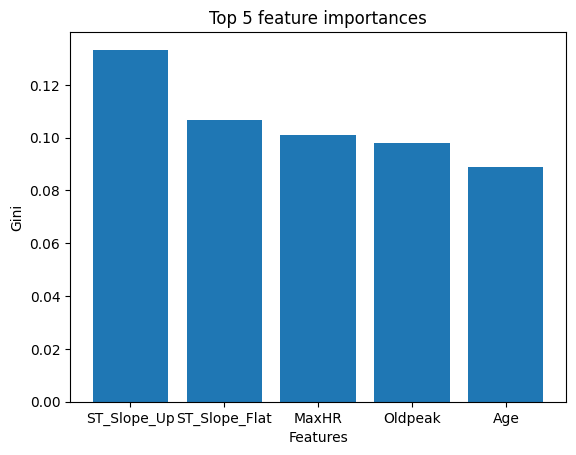

In [ ]:
-imp = pd.Series(clf_cf.feature_importances_)
imp.index = pd.Series(x_train.columns)
imp = imp.sort_values(ascending=False)
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

**6. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.**

In [ ]:
bagging = BaggingClassifier(dt,
                           n_estimators=100,
                           max_samples=0.7,
                           max_features=0.7,
                           random_state=42)

In [ ]:
start_bagging_time = time.time()
bagging.fit(x_train, y_train)
end_bagging_time = time.time()
elapsed_time_bagging = end_bagging_time - start_bagging_time
print(f'Время выполнения обучения бэггинга: {elapsed_time_bagging:.4f} секунд')

Время выполнения обучения бэггинга: 0.3126 секунд


In [ ]:
bagging_score = bagging.score(x_test, y_test)
print(f'Score для бэггинга: {bagging_score:.4f}')

Score для бэггинга: 0.9067


При n_estimators=150, max_samples=1,  max_features=1 значение Score = 0.4733, что говорит о том, что модель переобучилсь.

Перебрал несколько различных вариантов и пришёл к текущему, который даёт наибольшее значение метрики качества.

In [ ]:
results.loc[len(results)] = ['Бэггинг', bagging_score, elapsed_time_bagging]

**a) Повторите п. 5**

In [ ]:
# Предсказание на тестовой выборке для бэггинга
y_pred_bagging = bagging.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        71
           1       0.96      0.86      0.91        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



**8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.**

In [ ]:
models = [  ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
            ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
            ('svc', make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))),
         ]

In [ ]:
# Определение мета-классификатора
meta_classifier = LogisticRegression(random_state=42)

In [ ]:
# Создание и обучение модели StackingClassifier
stacking_clf = StackingClassifier(estimators=models, final_estimator=meta_classifier, cv=5)
start_stacking_time = time.time()
stacking_clf.fit(x_train, y_train)
end_stacking_time = time.time()
elapsed_time_stacking = end_stacking_time - start_stacking_time
print(f'Время выполнения обучения стекинга: {elapsed_time_stacking:.4f} секунд')

Время выполнения обучения стекинга: 2.1866 секунд


In [ ]:
# Оценка точности модели на тестовой выборке
stacking_score = stacking_clf.score(x_test, y_test)
print(f'Score для стекинга: {stacking_score:.4f}')

Score для стекинга: 0.9067


In [ ]:
results.loc[len(results)] = ['Стекинг', stacking_score, elapsed_time_stacking]

**a) Повторите п. 5**

In [ ]:
# Предсказание на тестовой выборке для стекинга
y_pred_stacking = stacking_clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        71
           1       0.93      0.89      0.91        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



**9. Сформулируйте выводы по проделанной работе.**

**a) Сравните метрики построенных моделей.**

In [ ]:
results

,Метод,Score,"Время обучения модели, с"
0,Дерево решений,0.833333,0.012491
1,Случайный лес,0.880000,0.204438
2,Бэггинг,0.906667,0.312598
3,Стекинг,0.906667,2.186597


В результате видим, что бэггинг и стекинг получили одинаковое значение точности, однако стекинг обучался в семь раз дольше. Можем предположить, что для данных моделей это значение точности является предельным и для повышения точности необходимо улучшить качество данных.

Наименьшее значение точности получило стандартное дерево решений, но при этом быстрее всех обучилось.

**b) Напишите свое мнение, какая модель наилучшая и почему.**

В данном случае можно сказать, что наилучшая модель - бэггинг, т.к. у неё наибольший показатель качества, при этом время обучения меньше, чем для модели стекинга с аналогичным значением метрики качества.

P.S.

Проверим модель catboost, разработчики которой утверждают, что их модель самая точная на базовых параметрах.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.8 MB/s eta 0:00:00


In [ ]:
cat = CatBoostRegressor(random_state=42)

In [ ]:
start_bagging_time = time.time()
bagging.fit(x_train, y_train)
end_bagging_time = time.time()
elapsed_time_bagging = end_bagging_time - start_bagging_time
print(f'Время выполнения обучения бэггинга: {elapsed_time_bagging:.4f} секунд')

In [ ]:
start_cat_time = time.time()
cat.fit(x_train, y_train)
end_cat_time = time.time()
elapsed_time_cat = end_cat_time - start_cat_time
print(f'Время выполнения обучения кэтбустинга: {elapsed_time_cat:.4f} секунд')

Learning rate set to 0.037728
0:	learn: 0.4913717	total: 714us	remaining: 714ms
1:	learn: 0.4825843	total: 4.97ms	remaining: 2.48s
2:	learn: 0.4741573	total: 8.81ms	remaining: 2.93s
3:	learn: 0.4660348	total: 12.4ms	remaining: 3.08s
4:	learn: 0.4580397	total: 16.3ms	remaining: 3.25s
5:	learn: 0.4499151	total: 20.2ms	remaining: 3.35s
6:	learn: 0.4434226	total: 24ms	remaining: 3.4s
7:	learn: 0.4368463	total: 27.8ms	remaining: 3.45s
8:	learn: 0.4317451	total: 30.2ms	remaining: 3.33s
9:	learn: 0.4258503	total: 31.8ms	remaining: 3.15s
10:	learn: 0.4190768	total: 35.1ms	remaining: 3.16s
11:	learn: 0.4129102	total: 39.7ms	remaining: 3.27s
12:	learn: 0.4070751	total: 44.7ms	remaining: 3.4s
13:	learn: 0.4019752	total: 48.8ms	remaining: 3.43s
14:	learn: 0.3970898	total: 52.4ms	remaining: 3.44s
15:	learn: 0.3941417	total: 54.9ms	remaining: 3.38s
16:	learn: 0.3897864	total: 57.2ms	remaining: 3.31s
17:	learn: 0.3849073	total: 61.1ms	remaining: 3.33s
18:	learn: 0.3806855	total: 65.5ms	remaining: 3.3

In [ ]:
cat_score = cat.score(x_test, y_test)
print(f'Score для кэтбустинга: {cat_score:.4f}')

Score для кэтбустинга: 0.6171


In [ ]:
results.loc[len(results)] = ['Кэтбустинг', cat_score, elapsed_time_cat]

In [ ]:
results

,Метод,Score,"Время обучения модели, с"
0,Дерево решений,0.833333,0.012491
1,Случайный лес,0.880000,0.204438
2,Бэггинг,0.906667,0.312598
3,Стекинг,0.906667,2.186597
4,Кэтбустинг,0.617066,4.804431


Можем заметить, что модель кэтбустинга имеет наименьшее значение метрики качества и наибольшее время обучения. Миф развеяли)